<a href="https://colab.research.google.com/github/douglasbarbosadelima/Data-Science/blob/master/stock_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.0.0 

     |████████████████████████████████| 380.8MB 31kB/s 
     |████████████████████████████████| 3.8MB 53.7MB/s 
     |████████████████████████████████| 450kB 47.4MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [3]:
import tensorflow as tf
import pandas as pd
import math
import numpy as np
import random

tf.__version__

'2.0.0'

In [4]:
df=pd.read_csv('krot3.CSV',delimiter=';')
df.head()

,Data,Abertura,Fechamento
0,07/01/2016,14.13,14.28
1,07/04/2016,14.40,14.08
2,07/05/2016,13.93,13.85
3,07/06/2016,13.90,13.57
4,07/07/2016,13.70,13.56


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 3 columns):
Data          177 non-null object
Abertura      177 non-null float64
Fechamento    177 non-null float64
dtypes: float64(2), object(1)
memory usage: 4.3+ KB


In [0]:
ind=df[df['Abertura']==0.0].index#há dias com movimentação 0.0, vamos eliminá-los

In [0]:
df.drop(ind,inplace=True)

In [21]:
df[df['Abertura'] == 0.0]#checking is always good

,Data,Abertura,Fechamento


Agora vamos criar sequências de 10 fechamentos, o target será o 11 fechamento

In [23]:
n=len(df)
print(n)
X=[]
y=[]
for i in range(n-10):
  seq=[]
  for j in range(10):
    seq.append([df.iloc[i+j,2]])
  X.append(seq)
  y.append([df.iloc[i+10,2]])
X=np.array(X)
y=np.array(y)


X[:3],y[:3]

161


(array([[[14.28],
         [14.08],
         [13.85],
         [13.57],
         [13.56],
         [14.12],
         [14.12],
         [14.63],
         [15.03],
         [15.45]],
 
        [[14.08],
         [13.85],
         [13.57],
         [13.56],
         [14.12],
         [14.12],
         [14.63],
         [15.03],
         [15.45],
         [15.64]],
 
        [[13.85],
         [13.57],
         [13.56],
         [14.12],
         [14.12],
         [14.63],
         [15.03],
         [15.45],
         [15.64],
         [15.8 ]]]), array([[15.64],
        [15.8 ],
        [15.74]]))

In [0]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.SimpleRNN(4,input_shape=(None,1),activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [0]:
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mse'])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 4)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


In [35]:
hist=model.fit(X, y, epochs=300, validation_split=0.3)

Train on 105 samples, validate on 46 samples
Epoch 1/300
105/105 [==============================] - 1s 10ms/sample - loss: 172.3171 - mse: 172.3171 - val_loss: 139.4358 - val_mse: 139.4358
Epoch 2/300
105/105 [==============================] - 0s 479us/sample - loss: 169.0995 - mse: 169.0995 - val_loss: 137.3570 - val_mse: 137.3570
Epoch 3/300
105/105 [==============================] - 0s 528us/sample - loss: 166.7047 - mse: 166.7047 - val_loss: 135.5662 - val_mse: 135.5662
Epoch 4/300
105/105 [==============================] - 0s 486us/sample - loss: 164.5823 - mse: 164.5823 - val_loss: 133.8725 - val_mse: 133.8725
Epoch 5/300
105/105 [==============================] - 0s 432us/sample - loss: 162.5584 - mse: 162.5584 - val_loss: 132.2620 - val_mse: 132.2620
Epoch 6/300
105/105 [==============================] - 0s 432us/sample - loss: 160.6118 - mse: 160.6118 - val_loss: 130.6491 - val_mse: 130.6490
Epoch 7/300
105/105 [==============================] - 0s 406us/sample - loss: 158.664

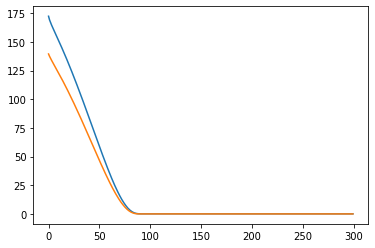

In [38]:
import matplotlib.pyplot as plt
#faça o gráfico da predição no dataset de treinamento
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.show()

In [0]:
#Faça split no fit (validation_split) e compare o gráfico de mse treino-teste

In [0]:
#faça split com sklearn split train test e use model.evaluate

In [36]:
#Tente melhorar o modelo